In [3]:
import pandas as pd
import csv
import missingno as msno
import datetime

In [4]:
order_items_dataset=pd.read_csv('../Data/olist_order_items_dataset.csv')  # Olist items datasest
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/17 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/17 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/18 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/18 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/17 13:57,199.90,18.14


In [5]:
order_dataset=pd.read_csv('../Data/olist_orders_dataset.csv')  # Olist orders datasest
order_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/17 10:56,10/2/17 11:07,10/4/17 19:55,10/10/17 21:25,10/18/17 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/18 20:41,7/26/18 3:24,7/26/18 14:31,8/7/18 15:27,8/13/18 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/18 8:38,8/8/18 8:55,8/8/18 13:50,8/17/18 18:06,9/4/18 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/17 19:28,11/18/17 19:45,11/22/17 13:39,12/2/17 0:28,12/15/17 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/18 21:18,2/13/18 22:20,2/14/18 19:46,2/16/18 18:17,2/26/18 0:00


In [6]:
olist_order_order_items=pd.merge(order_dataset, order_items_dataset,on=['order_id','order_id']) #full outer join based on seller id
olist_order_order_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/17 10:56,10/2/17 11:07,10/4/17 19:55,10/10/17 21:25,10/18/17 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/17 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/18 20:41,7/26/18 3:24,7/26/18 14:31,8/7/18 15:27,8/13/18 0:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/18 3:24,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/18 8:38,8/8/18 8:55,8/8/18 13:50,8/17/18 18:06,9/4/18 0:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,8/13/18 8:55,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/17 19:28,11/18/17 19:45,11/22/17 13:39,12/2/17 0:28,12/15/17 0:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,11/23/17 19:45,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/18 21:18,2/13/18 22:20,2/14/18 19:46,2/16/18 18:17,2/26/18 0:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2/19/18 20:31,19.90,8.72


In [7]:
olist_sellers_dataset=pd.read_csv('../Data/olist_sellers_dataset.csv') #olist seller data set
olist_sellers_dataset.head() 

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
olist_seller_order_items=pd.merge(olist_order_order_items, olist_sellers_dataset,on=['seller_id','seller_id']) #full outer join based on seller id
olist_seller_order_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/17 10:56,10/2/17 11:07,10/4/17 19:55,10/10/17 21:25,10/18/17 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/17 11:07,29.99,8.72,9350,maua,SP
1,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,8/10/17 13:35,8/10/17 13:50,8/11/17 13:52,8/16/17 19:03,8/23/17 0:00,1,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,8/16/17 13:50,75.90,7.79,9350,maua,SP
2,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,delivered,7/12/17 14:11,7/12/17 14:30,7/13/17 12:47,7/18/17 16:24,7/25/17 0:00,1,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,7/18/17 14:30,44.99,7.78,9350,maua,SP
3,a3bf941183211246f0d42ad757cba127,3718e1873d5dc3e8d96c0ab783278b02,delivered,7/24/17 22:16,7/25/17 22:25,7/26/17 14:57,7/28/17 19:06,8/4/17 0:00,1,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,7/31/17 22:25,44.99,7.78,9350,maua,SP
4,1462290799412b71be32dd880eaf4e1b,220e4b027f0294fd79d2869ef67e7db6,delivered,8/19/17 14:06,8/22/17 4:10,8/23/17 13:54,8/29/17 19:35,9/15/17 0:00,1,d7faab3fa0091d1220a8ada9cae1bab3,3504c0cb71d7fa48d967e0e4c94d59d9,8/28/17 4:10,29.90,14.10,9350,maua,SP


In [9]:
olist_products_dataset=pd.read_csv('../Data/olist_products_dataset.csv') #product dataset
olist_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
product_category_name_translation=pd.read_csv('../Data/product_category_name_translation.csv') #translation of product dataset
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
prod_cat_trans=pd.merge(olist_products_dataset, product_category_name_translation,on=['product_category_name','product_category_name'])
prod_cat_trans=prod_cat_trans.drop(columns=['product_category_name']) #join product and translation datset, drop repeating column
prod_cat_trans.head()  


,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [12]:

olist_seller_order_product= pd.merge(olist_seller_order_items, prod_cat_trans,on=['product_id','product_id'])
olist_seller_order_product.head()   #joined sellers with their products

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/17 10:56,10/2/17 11:07,10/4/17 19:55,10/10/17 21:25,10/18/17 0:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,8/15/17 18:29,8/15/17 20:05,8/17/17 15:28,8/18/17 14:44,8/28/17 0:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,8/2/17 18:24,8/2/17 18:43,8/4/17 17:35,8/7/17 18:30,8/15/17 0:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,10/23/17 23:26,10/25/17 2:14,10/27/17 16:48,11/7/17 18:04,11/13/17 0:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,8/10/17 13:35,8/10/17 13:50,8/11/17 13:52,8/16/17 19:03,8/23/17 0:00,1,b00a32a0b42fd65efb58a5822009f629,...,maua,SP,58.0,398.0,3.0,238.0,20.0,10.0,15.0,baby


In [13]:

#null_columns=olist_seller_order_product.columns[olist_seller_order_product.isnull().any()]
#olist_seller_order_product[null_columns].isnull().sum()
#print(olist_seller_order_product[olist_seller_order_product.isnull().any(axis=1)][null_columns].head())

In [14]:
order_location_dataset=pd.read_csv('../Data/olist_geolocation_dataset.csv')  # Olist location datasest
order_location_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [15]:
order_customer_dataset=pd.read_csv('../Data/olist_customers_dataset.csv')  # Olist customer datasest
order_customer_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [16]:
olist_seller_order_customer=pd.merge(olist_seller_order_product, order_customer_dataset,on=['customer_id','customer_id'])
olist_seller_order_customer.head()



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/17 10:56,10/2/17 11:07,10/4/17 19:55,10/10/17 21:25,10/18/17 0:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,8/15/17 18:29,8/15/17 20:05,8/17/17 15:28,8/18/17 14:44,8/28/17 0:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,8/2/17 18:24,8/2/17 18:43,8/4/17 17:35,8/7/17 18:30,8/15/17 0:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,10/23/17 23:26,10/25/17 2:14,10/27/17 16:48,11/7/17 18:04,11/13/17 0:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,housewares,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,8/10/17 13:35,8/10/17 13:50,8/11/17 13:52,8/16/17 19:03,8/23/17 0:00,1,b00a32a0b42fd65efb58a5822009f629,...,3.0,238.0,20.0,10.0,15.0,baby,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP


In [17]:
#Including reviews

order_reviews_dataset=pd.read_csv('../Data/olist_order_reviews_dataset.csv', encoding='latin-1')  # Olist order reviews datasest
order_reviews_dataset.head()
olist_seller_order_customer_reviews=pd.merge(olist_seller_order_customer, order_reviews_dataset[['order_id','review_score']],on=['order_id','order_id'])




In [18]:
olist_seller_order_customer_reviews.to_csv('seller_prd_customer.csv', sep=',')

In [19]:
list(olist_seller_order_customer_reviews.columns.values)


['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_category_name_english',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'review_score']

In [20]:
olist_seller_order_customer_reviews.shape


(111686, 30)

In [21]:
#olist_seller_order_customer_reviews = olist_seller_order_customer_reviews.reindex(columns=columns)
null_columns=olist_seller_order_customer_reviews.columns[olist_seller_order_customer_reviews.isnull().any()]
print(null_columns)
olist_seller_order_customer_reviews[null_columns].isnull().sum()

Index(['order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


order_approved_at                  14
order_delivered_carrier_date     1163
order_delivered_customer_date    2406
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
dtype: int64

In [22]:
#Computing Cancelled orders as NUll orders
olist_seller_order_customer_reviews_null=olist_seller_order_customer_reviews
olist_seller_order_customer_reviews_null.loc[olist_seller_order_customer_reviews_null.order_status =='canceled', 'order_status'] = None 
null_columns=olist_seller_order_customer_reviews_null.columns[olist_seller_order_customer_reviews_null.isnull().any()]
print(null_columns)
olist_seller_order_customer_reviews_null[null_columns].isnull().sum()



Index(['order_status', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


order_status                      530
order_approved_at                  14
order_delivered_carrier_date     1163
order_delivered_customer_date    2406
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
dtype: int64

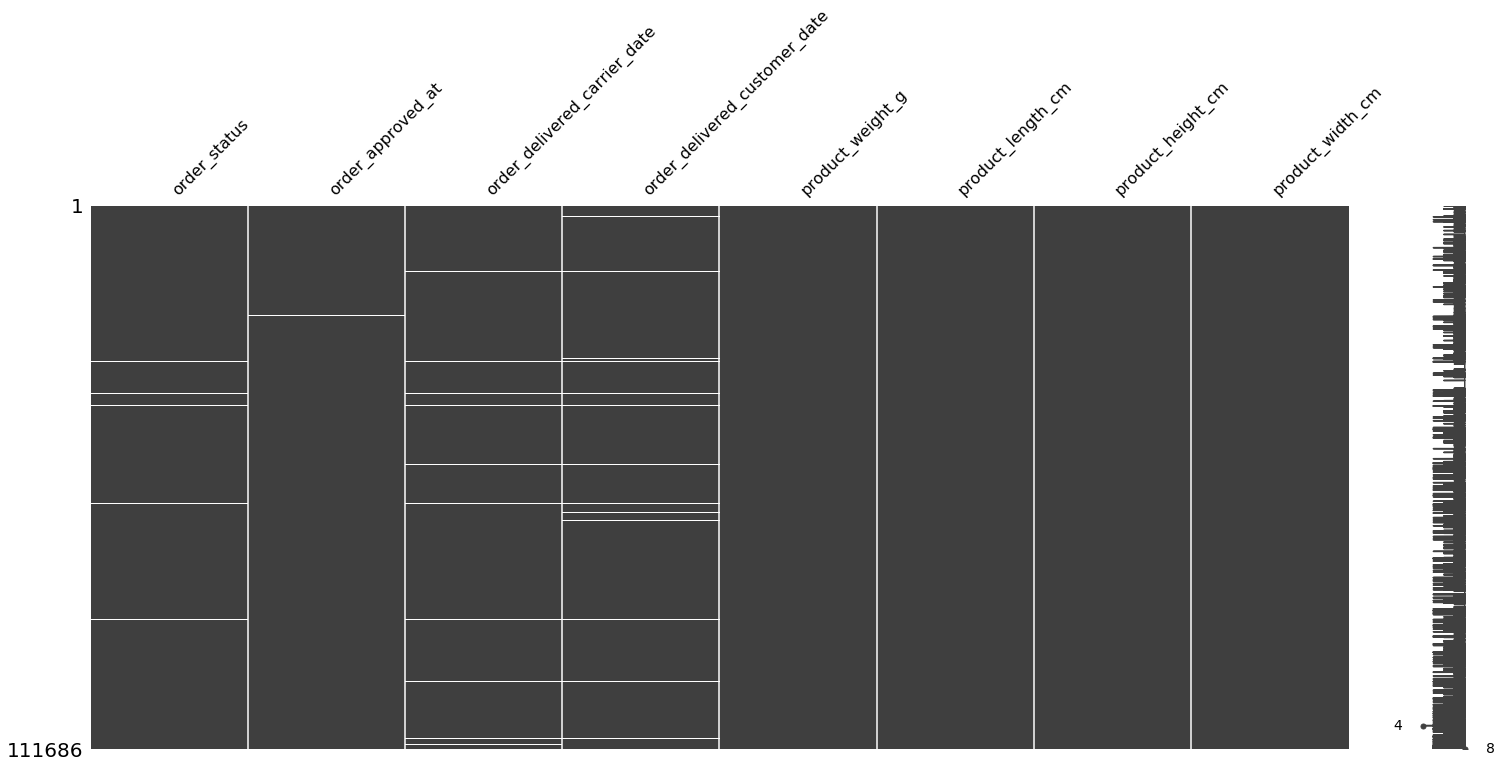

In [23]:
#Missing Value Analysis
missingdata = olist_seller_order_customer_reviews_null.columns[olist_seller_order_customer_reviews_null.isnull().any()].tolist()
msno.matrix(olist_seller_order_customer_reviews_null[missingdata])





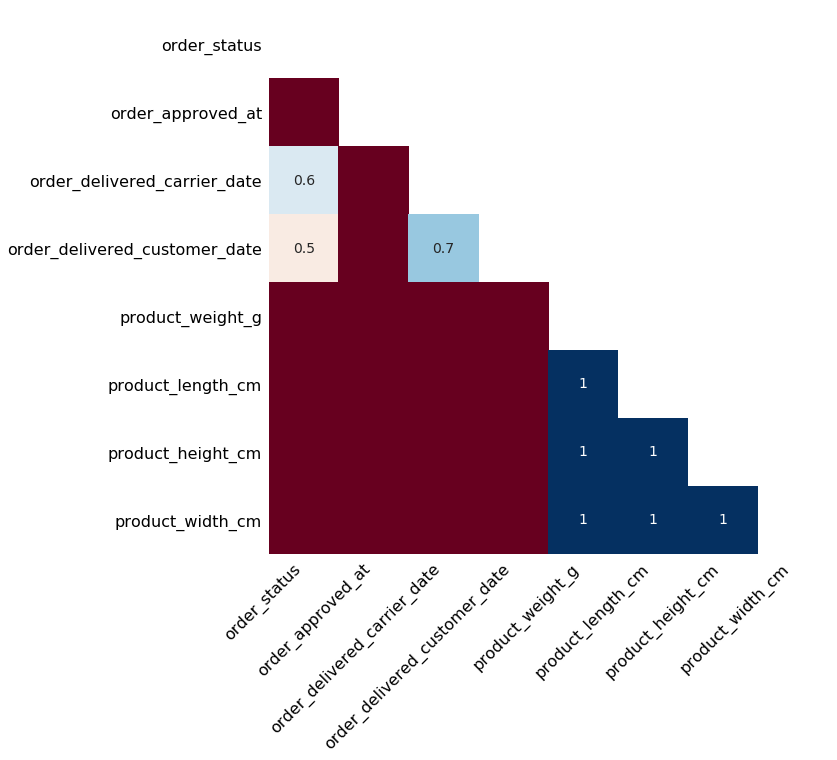

In [24]:
msno.heatmap(olist_seller_order_customer_reviews_null[missingdata], figsize=(10,10))

Index(['order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date'],
      dtype='object')
order_approved_at                  14
order_delivered_carrier_date      708
order_delivered_customer_date    1883
dtype: int64


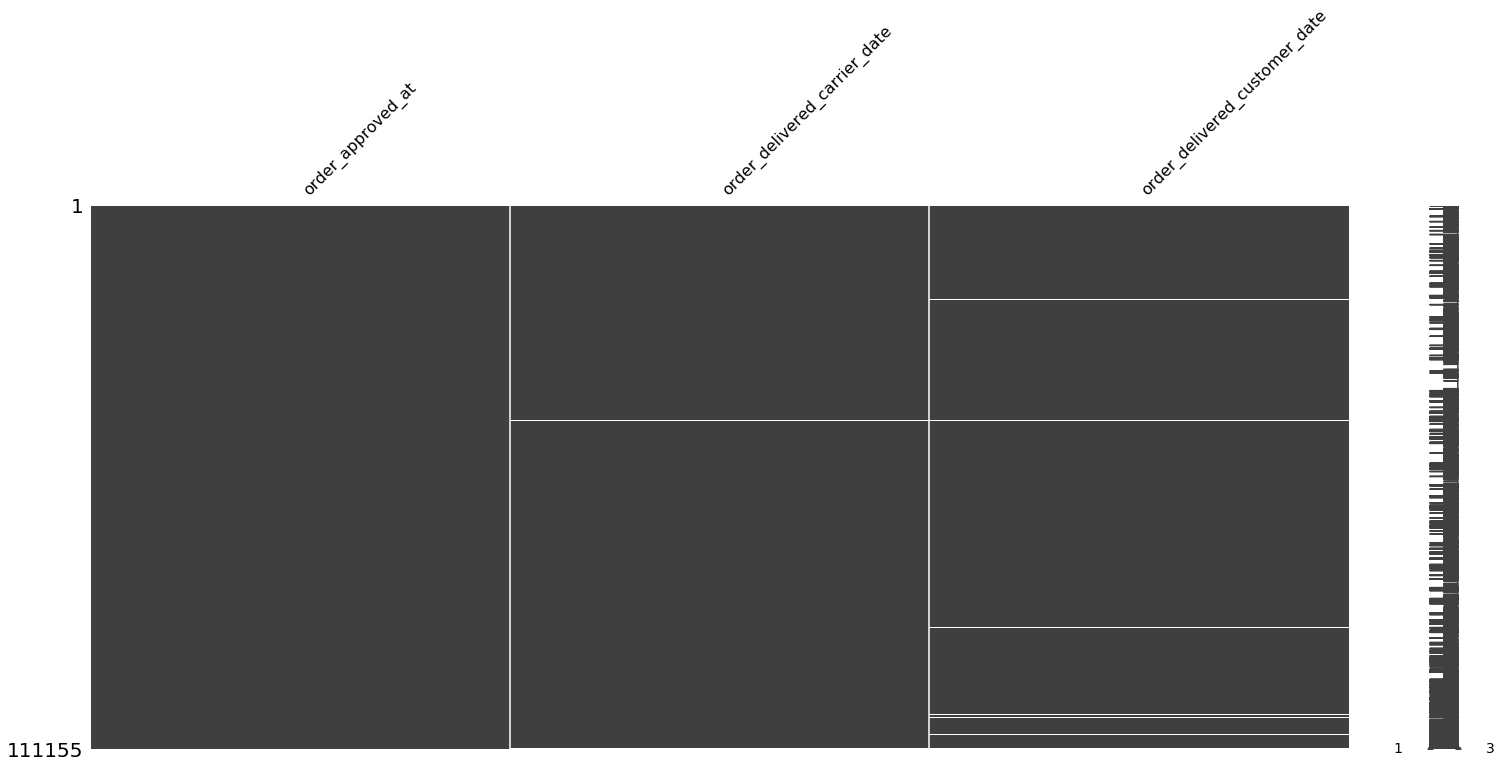

In [25]:
olist_seller_order_customer_reviews_null.head()
olist_seller_order_customer_reviews_null.dropna(subset=['order_status','product_weight_g','product_height_cm','product_length_cm','product_width_cm'],inplace=True)
null_columns=olist_seller_order_customer_reviews_null.columns[olist_seller_order_customer_reviews_null.isnull().any()]
print(null_columns)
print(olist_seller_order_customer_reviews_null[null_columns].isnull().sum())
#Missing Value Analysis
missingdata = olist_seller_order_customer_reviews_null.columns[olist_seller_order_customer_reviews_null.isnull().any()].tolist()
msno.matrix(olist_seller_order_customer_reviews_null[missingdata])


In [26]:
olist_seller_order_customer_reviews_null.head()
olist_seller_order_customer_reviews_null.dropna(subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','product_length_cm','product_width_cm'],inplace=True)
print(olist_seller_order_customer_reviews_null.count())

order_id                         109257
customer_id                      109257
order_status                     109257
order_purchase_timestamp         109257
order_approved_at                109257
order_delivered_carrier_date     109257
order_delivered_customer_date    109257
order_estimated_delivery_date    109257
order_item_id                    109257
product_id                       109257
seller_id                        109257
shipping_limit_date              109257
price                            109257
freight_value                    109257
seller_zip_code_prefix           109257
seller_city                      109257
seller_state                     109257
product_name_lenght              109257
product_description_lenght       109257
product_photos_qty               109257
product_weight_g                 109257
product_length_cm                109257
product_height_cm                109257
product_width_cm                 109257
product_category_name_english    109257


In [27]:
#Calculating  difference of days between order placed and order delivered to customer
olist_seller_order_customer_reviews_null['datediff_purchase_deliver']=pd.to_datetime(olist_seller_order_customer_reviews_null['order_delivered_customer_date']).dt.date-pd.to_datetime(olist_seller_order_customer_reviews_null['order_purchase_timestamp']).dt.date 


In [28]:
olist_seller_order_customer_reviews_null['datediff_purchase_deliver']

0         8 days
1         3 days
2         5 days
3        15 days
4         6 days
5        10 days
6         8 days
7         2 days
8         9 days
11        4 days
12        4 days
13        8 days
14       12 days
15        6 days
16        4 days
17        2 days
18        6 days
19        4 days
20       10 days
21        7 days
22        5 days
23        7 days
24        6 days
25        2 days
26        9 days
27       14 days
28        5 days
29        8 days
30        4 days
31        9 days
           ...  
111644   14 days
111645    7 days
111646    3 days
111647    8 days
111648   45 days
111653   13 days
111654    9 days
111656    3 days
111657   19 days
111658   13 days
111660   86 days
111661    3 days
111662   30 days
111663    8 days
111664   12 days
111665   14 days
111666   14 days
111667    2 days
111668   33 days
111671   12 days
111672   15 days
111673    5 days
111674   17 days
111675    5 days
111677   11 days
111678   11 days
111681    8 days
111683    9 da

In [29]:
#Transfering the new Dataframe without any null values into a csv file
olist_seller_order_customer_reviews_null.to_csv('../FeatureEng/seller_prd_customer.csv', sep=',')